# **วิเคราะห์แนวโน้มการติด Covid - 19 จากอาการ**

### 📂เกี่ยวกับชุดข้อมูล
เป็นชุดข้อมูลที่เกี่ยวข้องกับการวิเคราะห์อาการ COVID-19

🧾 ข้อมูลประกอบไปด้วย :

• Fever : ไข้  
• Tiredness : เหน็ดเหนื่อยเมื่อยล้า  
• Dry-Cough : ไอแห้ง  
• Difficulty-in-Breathing : หายใจลำบาก  
• Sore-Throat : เจ็บคอ  
• None_Sympton : ไม่มีอาการ  
• Pains : ความเจ็บปวด  
• Nasal-Congestion : คัดจมูก  
• Runny-Nose : อาการน้ำมูกไหล  
• Diarrhea : ท้องเสีย  
• None_Experiencing : ไม่มีประสบการณ์  
• Severity_Mild : รุนแรงเล็กน้อย  
• Severity_Moderate : ความรุนแรงปานกลาง  
• Severity_None : ความรุนแรงไม่มี  
• Severity_Severe : ความรุนแรงมากที่สุด

### 📚 Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import norm
from scipy import stats
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [79]:
data = pd.read_csv("Cleaned-Data.csv")

pd.pandas.set_option('display.max_columns',None)

In [80]:
display("Peeking into Data", data)

'Peeking into Data'

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Severity_None,Severity_Mild,Severity_Moderate,Severity_Severe,Covid
0,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,1
1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,1
2,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,1
3,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1
4,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1
316797,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
316798,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1


In [81]:
display("Description",data.describe())

'Description'

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Severity_None,Severity_Mild,Severity_Moderate,Severity_Severe,Covid
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.0
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,0.090909,0.250000,0.250000,0.250000,0.250000,1.0
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,0.287480,0.433013,0.433013,0.433013,0.433013,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.250000,0.250000,0.250000,0.250000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


array([[<AxesSubplot: title={'center': 'Fever'}>,
        <AxesSubplot: title={'center': 'Tiredness'}>,
        <AxesSubplot: title={'center': 'Dry-Cough'}>,
        <AxesSubplot: title={'center': 'Difficulty-in-Breathing'}>],
       [<AxesSubplot: title={'center': 'Sore-Throat'}>,
        <AxesSubplot: title={'center': 'None_Sympton'}>,
        <AxesSubplot: title={'center': 'Pains'}>,
        <AxesSubplot: title={'center': 'Nasal-Congestion'}>],
       [<AxesSubplot: title={'center': 'Runny-Nose'}>,
        <AxesSubplot: title={'center': 'Diarrhea'}>,
        <AxesSubplot: title={'center': 'None_Experiencing'}>,
        <AxesSubplot: title={'center': 'Severity_None'}>],
       [<AxesSubplot: title={'center': 'Severity_Mild'}>,
        <AxesSubplot: title={'center': 'Severity_Moderate'}>,
        <AxesSubplot: title={'center': 'Severity_Severe'}>,
        <AxesSubplot: title={'center': 'Covid'}>]], dtype=object)

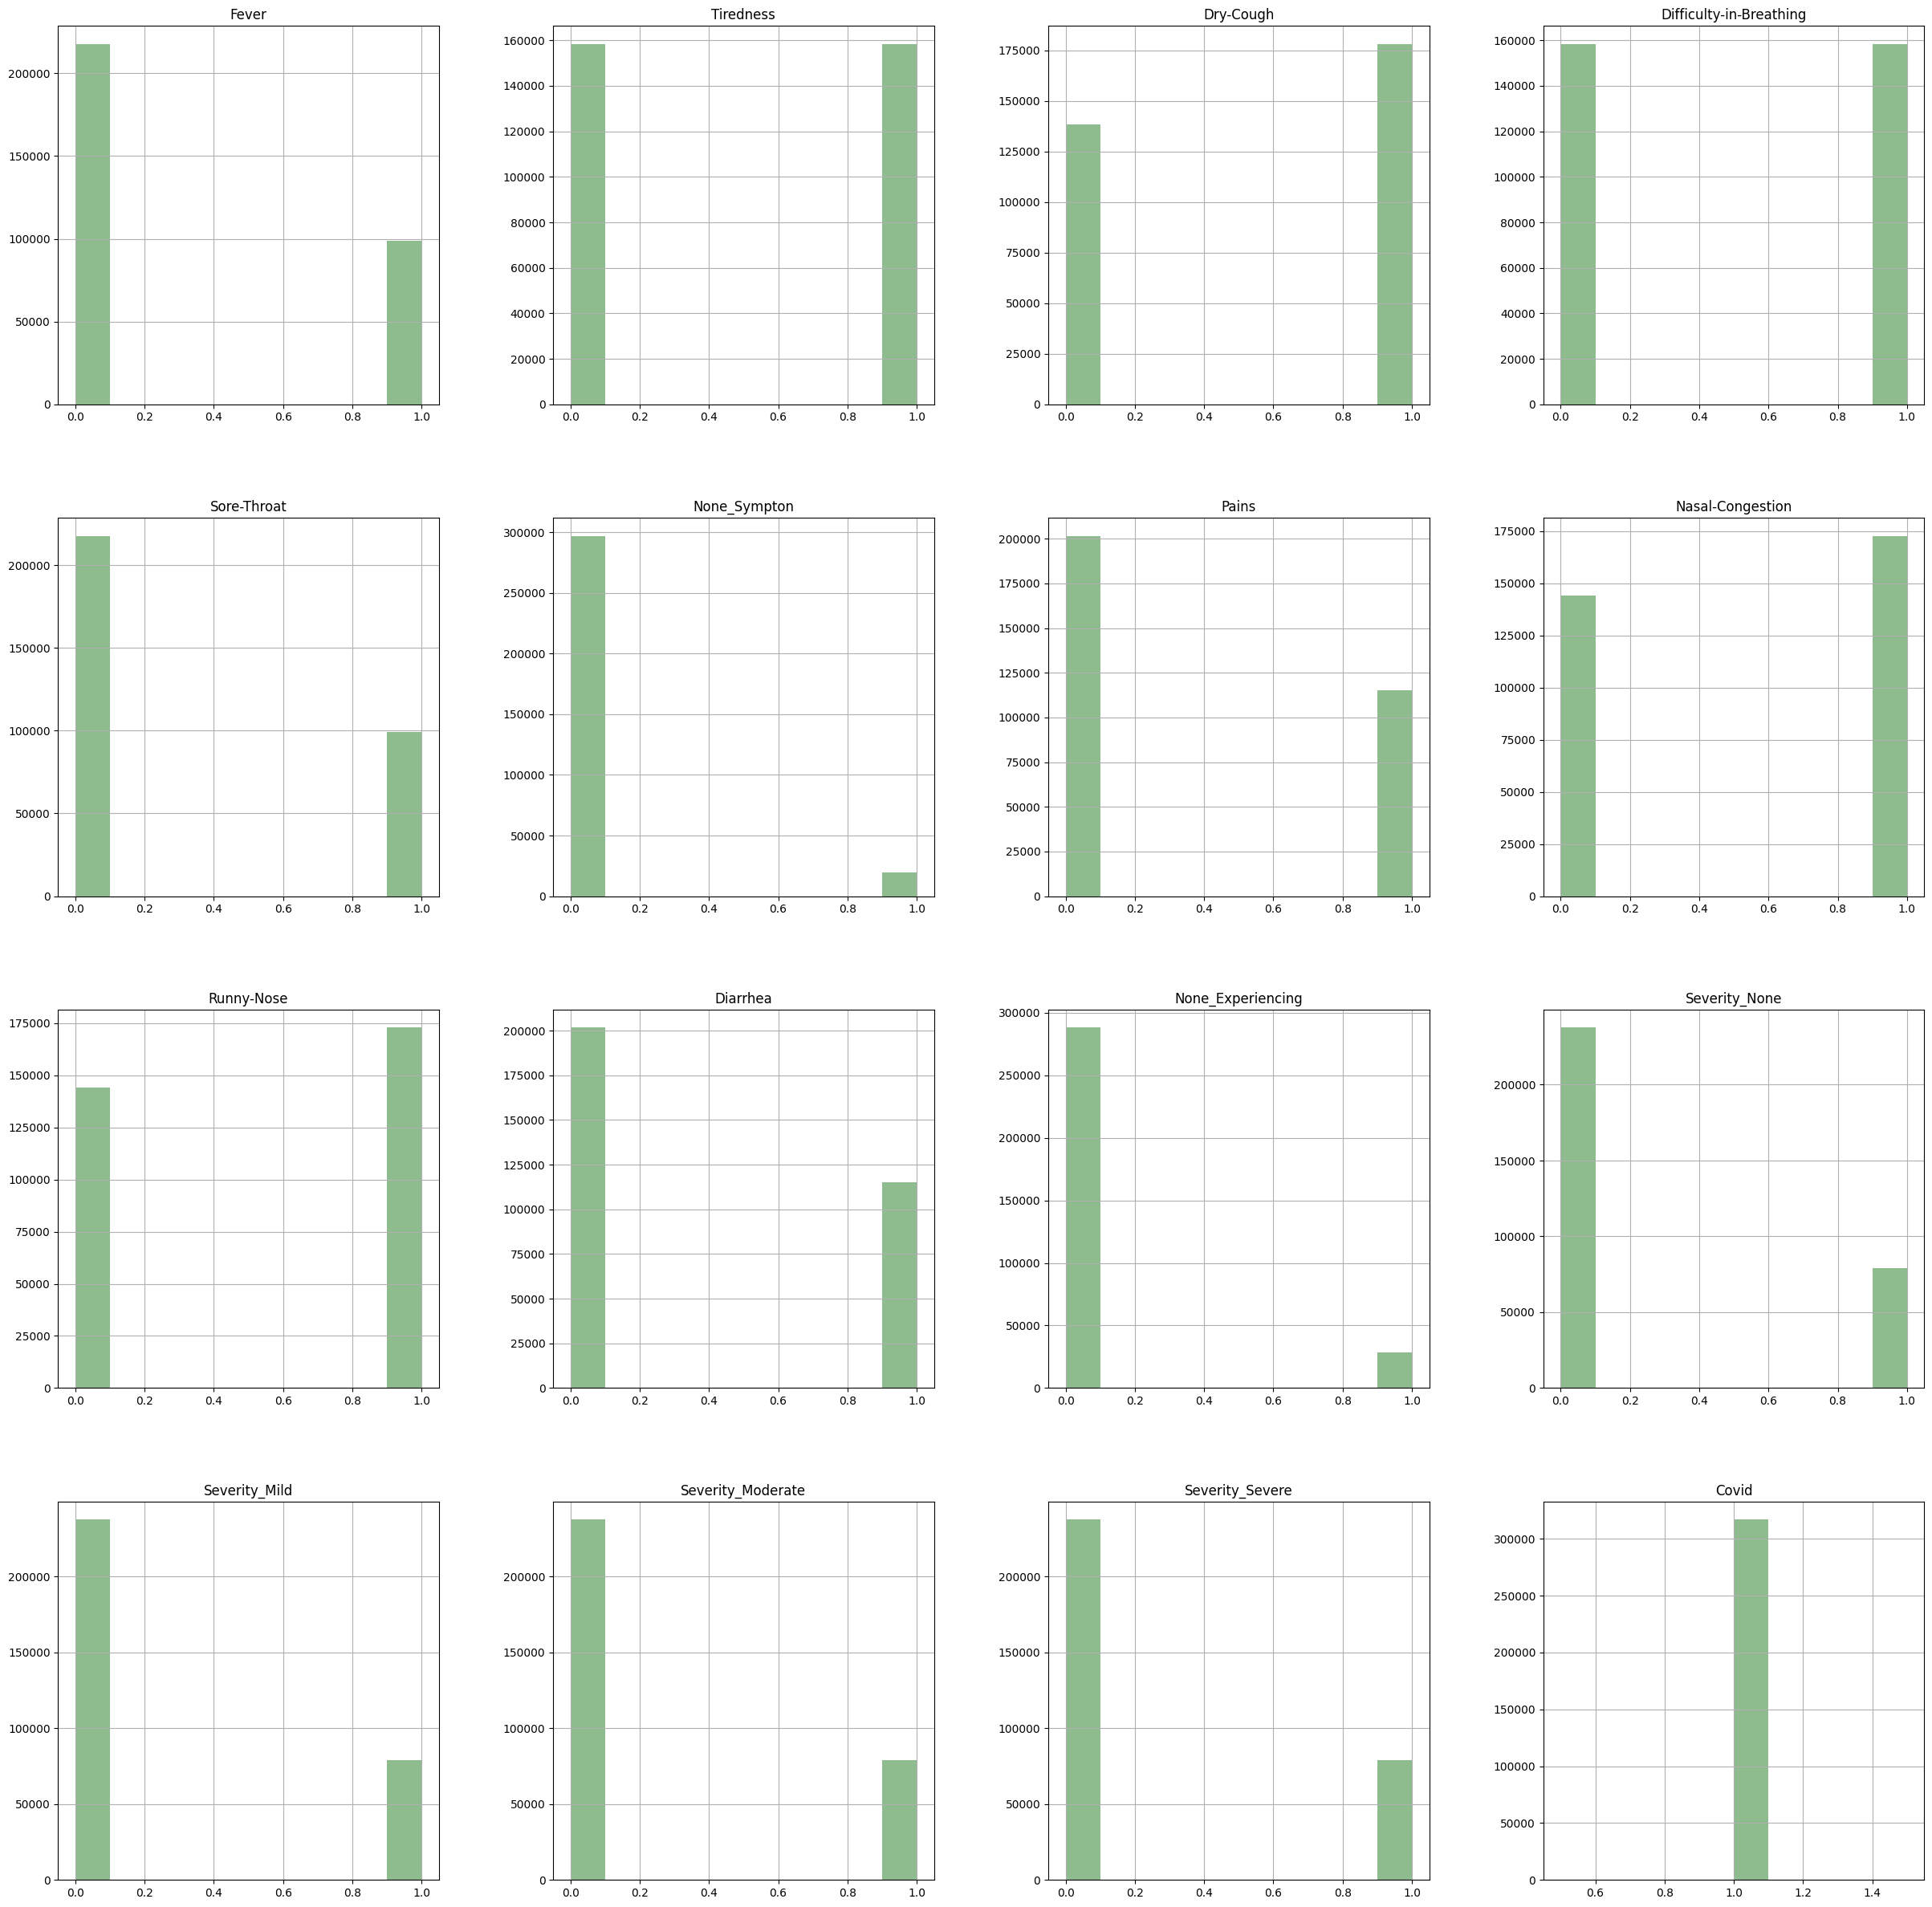

In [82]:
data.hist(figsize=(30,30), color='darkseagreen')

In [78]:
plotCorrelationMatrix(data, 8)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing
Fever,1.000000e+00,4.045199e-01,5.096472e-02,-1.348400e-01,-1.636364e-01,-1.740777e-01,2.336708e-17,-8.120278e-17,-1.708735e-16,-4.663218e-17,-2.972693e-17
Tiredness,4.045199e-01,1.000000e+00,3.779645e-01,4.629153e-17,-1.348400e-01,-2.581989e-01,2.612420e-17,-6.526807e-17,-1.561936e-16,-5.916164e-17,-2.497080e-17
Dry-Cough,5.096472e-02,3.779645e-01,1.000000e+00,3.779645e-01,5.096472e-02,-2.927700e-01,4.519459e-18,-5.180861e-17,-9.767619e-17,-1.403602e-17,-1.629225e-18
Difficulty-in-Breathing,-1.348400e-01,4.629153e-17,3.779645e-01,1.000000e+00,4.045199e-01,-2.581989e-01,-9.663757e-19,1.076763e-17,-1.091121e-17,1.067239e-17,-7.031419e-18
Sore-Throat,-1.636364e-01,-1.348400e-01,5.096472e-02,4.045199e-01,1.000000e+00,-1.740777e-01,-1.063529e-17,3.705775e-17,2.844633e-17,1.819491e-17,2.188163e-18
None_Sympton,-1.740777e-01,-2.581989e-01,-2.927700e-01,-2.581989e-01,-1.740777e-01,1.000000e+00,-1.214988e-17,5.584296e-17,8.167388e-17,1.392255e-17,7.508786e-18
Pains,2.336708e-17,2.612420e-17,4.519459e-18,-9.663757e-19,-1.063529e-17,-1.214988e-17,1.000000e+00,3.105295e-01,-6.900656e-02,-1.785714e-01,-2.390457e-01
Nasal-Congestion,-8.120278e-17,-6.526807e-17,-5.180861e-17,1.076763e-17,3.705775e-17,5.584296e-17,3.105295e-01,1.000000e+00,2.666667e-01,-6.900656e-02,-3.464102e-01
Runny-Nose,-1.708735e-16,-1.561936e-16,-9.767619e-17,-1.091121e-17,2.844633e-17,8.167388e-17,-6.900656e-02,2.666667e-01,1.000000e+00,3.105295e-01,-3.464102e-01
Diarrhea,-4.663218e-17,-5.916164e-17,-1.403602e-17,1.067239e-17,1.819491e-17,1.392255e-17,-1.785714e-01,-6.900656e-02,3.105295e-01,1.000000e+00,-2.390457e-01
